# Pipeline considerando RandomForest Classsifier

In [1]:
import pandas as pd
df = pd.read_csv("../../../data/madelon_post_eda_train.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,0.560976,0.438356,0.588028,0.393939,0.255521,0.260870,0.566787,0.5,0.424528,0.375000,...,0.529412,0.491429,0.449367,0.578947,0.330798,0.558140,0.44,0.398577,0.516667,-1
1,0.512195,0.351598,0.316901,0.515152,0.681388,0.347826,0.693141,0.8,0.518868,0.291667,...,0.441176,0.548571,0.263291,0.587045,0.334601,0.604651,0.57,0.523132,0.633333,-1
2,0.609756,0.735160,0.454225,0.227273,0.242902,0.260870,0.389892,0.7,0.471698,0.458333,...,0.529412,0.577143,0.658228,0.558704,0.391635,0.534884,0.54,0.483986,0.527778,-1
3,0.439024,0.502283,0.492958,0.484848,0.391167,0.282609,0.299639,0.3,0.679245,0.437500,...,0.500000,0.474286,0.559494,0.348178,0.269962,0.418605,0.47,0.466192,0.322222,1
4,0.536585,0.552511,0.556338,0.545455,0.299685,0.478261,0.245487,0.7,0.537736,0.270833,...,0.470588,0.348571,0.386076,0.477733,0.418251,0.558140,0.69,0.469751,0.600000,1


In [2]:
y = df['target']
df = df.drop(columns=['target'])

Best estimator: 600
    estimators   score
0        100.0  0.6815
1        200.0  0.6865
2        300.0  0.6920
3        400.0  0.6960
4        500.0  0.6930
5        600.0  0.6975
6        700.0  0.6920
7        800.0  0.6960
8        900.0  0.6940
9       1000.0  0.6935
10      1100.0  0.6945
11      1200.0  0.6975
12      1300.0  0.6950
13      1400.0  0.6935
14      1500.0  0.6950
15      1600.0  0.6945
16      1700.0  0.6965
17      1800.0  0.6950
18      1900.0  0.6950
19      2000.0  0.6945


<AxesSubplot:xlabel='estimators', ylabel='score'>

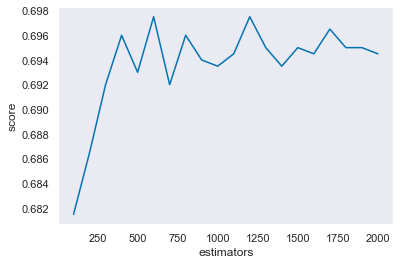

In [3]:
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
min_estimators = 100
max_estimators = 2000
step = 100
result = []
best_score = 0
best_estimator = 0

for i in range(min_estimators, max_estimators+step, step):
    clf = RandomForestClassifier(n_estimators=i, max_depth=None, random_state=1234, n_jobs=-1)
    scores = cross_val_score(clf, df, y, cv=5)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

# plotting results
sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

In [5]:
import seaborn as sns
import numpy as np
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = RandomForestClassifier(n_estimators=best_estimator)
clf.fit(df, y)
scores = cross_val_score(clf, df, y, cv=5)
y_pred = cross_val_predict(clf, df, y, cv=5)
print("accuracy_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

accuracy_score: 0.69600 (+/- 0.01102)


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[741 259]
 [354 646]]
              precision    recall  f1-score   support

          -1       0.68      0.74      0.71      1000
           1       0.71      0.65      0.68      1000

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.69      0.69      2000

